### Imports

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

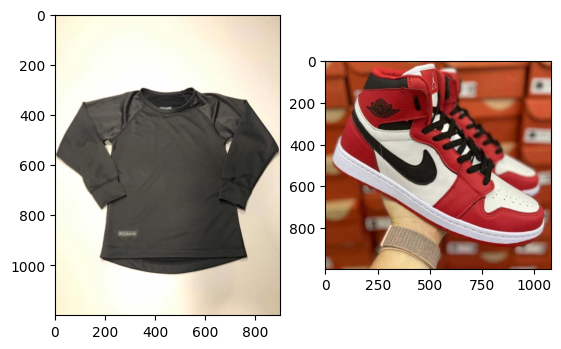

In [2]:
os.chdir('/workspace/')
path_a='./data/production_imgs/D_600103-MLA49961147830_052022-F.jpg'
path_b='./data/tf-imgs/class_b/D_602671-MLB50588751892_072022-F.jpg'

a=cv2.cvtColor(cv2.imread(path_a), cv2.COLOR_BGR2RGB)
b=cv2.cvtColor(cv2.imread(path_b), cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(a)
axs[1].imshow(b)

### Find contours

28

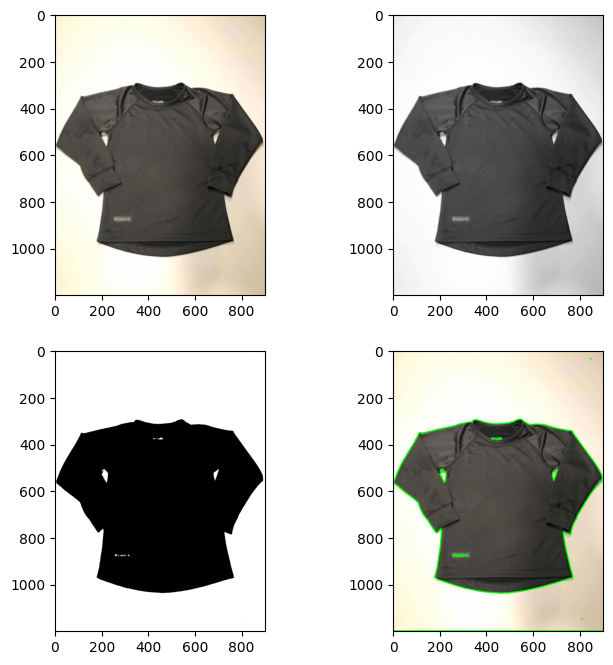

In [168]:
image=a.copy()
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    image=thresh,
    mode=cv2.RETR_TREE,
    method=cv2.CHAIN_APPROX_SIMPLE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(
    image=image_copy,
    contours=contours,
    contourIdx=-1,
    color=(0, 255, 0),
    thickness=3,
    lineType=cv2.LINE_AA
    )

fig, axs = plt.subplots(2, 2, figsize=(8,8))

axs[0,0].imshow(image)
axs[0,1].imshow(img_gray, cmap='gray')
axs[1,0].imshow(thresh, cmap='gray')
axs[1,1].imshow(image_copy)

len(contours)


Text(0.5, 0.98, 'Masking contour shapes to isolate background\n and perform calculations')

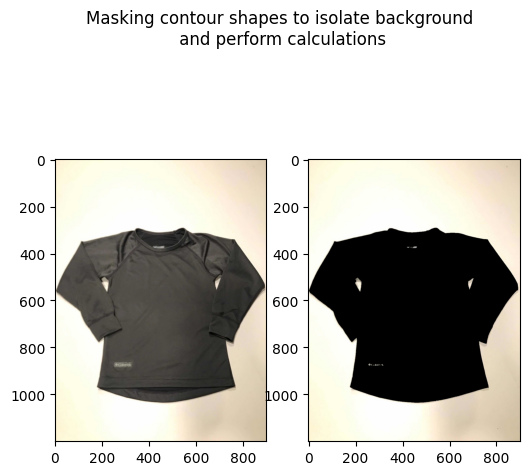

In [169]:
masked = cv2.bitwise_and(image, image, mask=thresh)

fig, axs = plt.subplots(1,2,figsize=(6,6))

axs[0].imshow(image)
axs[1].imshow(masked)
fig.suptitle('Masking contour shapes to isolate background\n and perform calculations', fontsize=12)

527

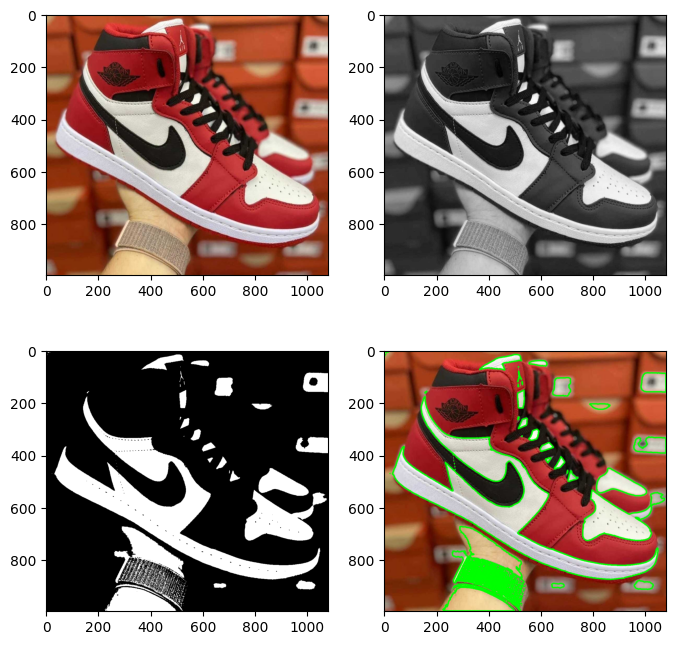

In [55]:
image=b.copy()
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
    image=thresh,
    mode=cv2.RETR_EXTERNAL,
    method=cv2.CHAIN_APPROX_SIMPLE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(
    image=image_copy,
    contours=contours,
    contourIdx=-1,
    color=(0, 255, 0),
    thickness=3,
    lineType=cv2.LINE_AA
    )

fig, axs = plt.subplots(2, 2, figsize=(8,8))

axs[0,0].imshow(image)
axs[0,1].imshow(img_gray, cmap='gray')
axs[1,0].imshow(thresh, cmap='gray')
axs[1,1].imshow(image_copy)

len(contours)


* Using external contours to approximate indices that shows the complexity of the image

---

### Edge color difference

##### Class 1 image

Text(0.5, 0.98, 'Comparison of corners average colors\nto determine background similarity')

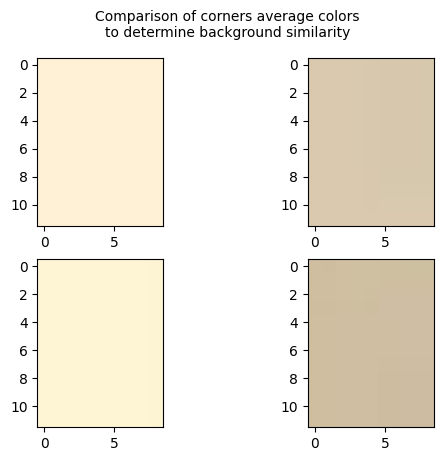

In [156]:
edge_a=a.copy()
x=edge_a.shape[1]
y=edge_a.shape[0]

# Image corners
fig, axs=plt.subplots(2,2)

top_left=edge_a[:int(y*0.01),:int(x*0.01),:]
top_right=edge_a[:int(y*0.01),int(x*0.99):,:]
bottom_left=edge_a[int(y*0.99):,:int(x*0.01),:]
bottom_right=edge_a[int(y*0.99):,int(x*0.99):,:]

axs[0,0].imshow(top_left, cmap='gray')
axs[0,1].imshow(top_right, cmap='gray')
axs[1,0].imshow(bottom_left, cmap='gray')
axs[1,1].imshow(bottom_right, cmap='gray')

fig.suptitle('Comparison of corners average colors\nto determine background similarity', fontsize=10)

Text(0.5, 0.98, 'Average color of top left corner')

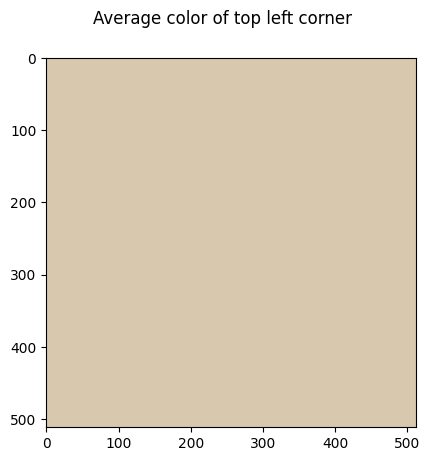

In [157]:
avg_color_per_row = np.average(top_right, axis=0)
avg_color = np.average(avg_color_per_row, axis=0)
back=np.zeros((512,512,3), np.uint8)
rect=cv2.rectangle(back,(0,0),(512,512),avg_color,-1)

fig,axs=plt.subplots()
axs.imshow(rect)
fig.suptitle('Average color of top left corner')

##### Class 0 image

Text(0.5, 0.98, 'Comparison of corners average colors\nto determine background similarity')

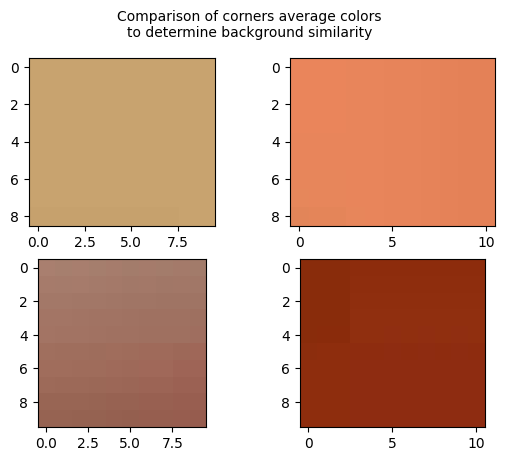

In [158]:
edge_a=b.copy()
x=edge_a.shape[1]
y=edge_a.shape[0]

# Image corners
fig, axs=plt.subplots(2,2)

top_left=edge_a[:int(y*0.01),:int(x*0.01),:]
top_right=edge_a[:int(y*0.01),int(x*0.99):,:]
bottom_left=edge_a[int(y*0.99):,:int(x*0.01),:]
bottom_right=edge_a[int(y*0.99):,int(x*0.99):,:]

axs[0,0].imshow(top_left, cmap='gray')
axs[0,1].imshow(top_right, cmap='gray')
axs[1,0].imshow(bottom_left, cmap='gray')
axs[1,1].imshow(bottom_right, cmap='gray')

fig.suptitle('Comparison of corners average colors\nto determine background similarity', fontsize=10)

Text(0.5, 0.98, 'Average color of top left corner')

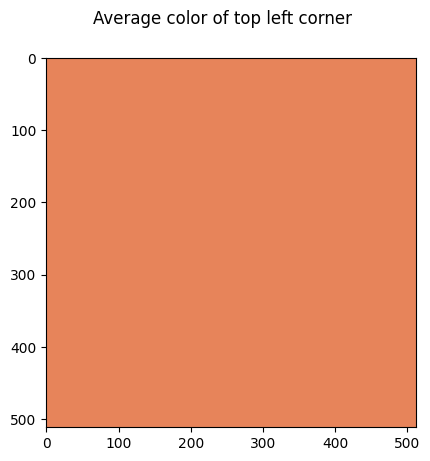

In [159]:
avg_color_per_row = np.average(top_right, axis=0)
avg_color = np.average(avg_color_per_row, axis=0)
back=np.zeros((512,512,3), np.uint8)
rect=cv2.rectangle(back,(0,0),(512,512),avg_color,-1)

fig,axs=plt.subplots()
axs.imshow(rect)
fig.suptitle('Average color of top left corner')

---

### Notes

* Corner color could create a metric to determine how far away are the 4 corners average colors. If they are very similar, then there's a tendency to a uniform background.

* External countour detection could determine a metric to determine how many protagonic shapes are in the image. If there are many images in the parent hierarchy then there's a tendency to have a non uniform/very populated image.

* Some tests should be performed to determine if countours could also be useful for masking the bigger objects and perform calculations in what should be an isolated background.